## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.326008 -1.737837 -0.702677  1.086464 -0.302185 -0.615832
1  1.452199  1.010958 -0.691886  0.071580 -0.495841  0.066486
2 -0.741719  0.203640  1.730038  1.244398  0.891075  1.588453
3  0.490401  0.179889 -0.047491 -0.179847  0.128417  0.383988
4  1.570637 -0.694559 -0.629128 -0.267624  0.299279  0.314739


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0112131	total: 57.6ms	remaining: 57.5s
1:	learn: 1.0026108	total: 58.2ms	remaining: 29s
2:	learn: 0.9934898	total: 58.8ms	remaining: 19.5s
3:	learn: 0.9832416	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9743335	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9651122	total: 60.5ms	remaining: 10s
6:	learn: 0.9544935	total: 60.9ms	remaining: 8.64s
7:	learn: 0.9454705	total: 61.5ms	remaining: 7.63s
8:	learn: 0.9378302	total: 62ms	remaining: 6.83s
9:	learn: 0.9295203	total: 62.5ms	remaining: 6.19s
10:	learn: 0.9205145	total: 63ms	remaining: 5.66s
11:	learn: 0.9110389	total: 63.6ms	remaining: 5.23s
12:	learn: 0.9021653	total: 64.1ms	remaining: 4.87s
13:	learn: 0.8934166	total: 64.6ms	remaining: 4.55s
14:	learn: 0.8858774	total: 65.1ms	remaining: 4.27s
15:	learn: 0.8795547	total: 65.5ms	remaining: 4.03s
16:	learn: 0.8725939	total: 65.9ms	remaining: 3.81s
17:	learn: 0.8659054	total: 67ms	remaining: 3.66s
18:	learn: 0.8585306	total: 67.5ms	remaining: 3.48s
19

90:	learn: 0.4719858	total: 107ms	remaining: 1.06s
91:	learn: 0.4681534	total: 107ms	remaining: 1.06s
92:	learn: 0.4647936	total: 108ms	remaining: 1.05s
93:	learn: 0.4609417	total: 108ms	remaining: 1.04s
94:	learn: 0.4569221	total: 108ms	remaining: 1.03s
95:	learn: 0.4533135	total: 109ms	remaining: 1.02s
96:	learn: 0.4504062	total: 109ms	remaining: 1.02s
97:	learn: 0.4473271	total: 110ms	remaining: 1.01s
98:	learn: 0.4433272	total: 110ms	remaining: 1s
99:	learn: 0.4401223	total: 111ms	remaining: 997ms
100:	learn: 0.4364757	total: 111ms	remaining: 989ms
101:	learn: 0.4334224	total: 112ms	remaining: 982ms
102:	learn: 0.4296278	total: 112ms	remaining: 975ms
103:	learn: 0.4262553	total: 112ms	remaining: 969ms
104:	learn: 0.4222309	total: 113ms	remaining: 962ms
105:	learn: 0.4190074	total: 113ms	remaining: 956ms
106:	learn: 0.4158940	total: 114ms	remaining: 950ms
107:	learn: 0.4128498	total: 116ms	remaining: 954ms
108:	learn: 0.4091582	total: 116ms	remaining: 947ms
109:	learn: 0.4064674	tot

243:	learn: 0.1600450	total: 187ms	remaining: 581ms
244:	learn: 0.1587379	total: 188ms	remaining: 580ms
245:	learn: 0.1576898	total: 189ms	remaining: 578ms
246:	learn: 0.1565216	total: 189ms	remaining: 576ms
247:	learn: 0.1554304	total: 189ms	remaining: 574ms
248:	learn: 0.1543865	total: 190ms	remaining: 573ms
249:	learn: 0.1532538	total: 190ms	remaining: 571ms
250:	learn: 0.1522748	total: 191ms	remaining: 569ms
251:	learn: 0.1513403	total: 191ms	remaining: 567ms
252:	learn: 0.1503289	total: 191ms	remaining: 565ms
253:	learn: 0.1493177	total: 192ms	remaining: 563ms
254:	learn: 0.1483706	total: 192ms	remaining: 562ms
255:	learn: 0.1473661	total: 193ms	remaining: 560ms
256:	learn: 0.1464387	total: 193ms	remaining: 558ms
257:	learn: 0.1455116	total: 194ms	remaining: 557ms
258:	learn: 0.1449635	total: 194ms	remaining: 555ms
259:	learn: 0.1439277	total: 194ms	remaining: 553ms
260:	learn: 0.1430116	total: 195ms	remaining: 552ms
261:	learn: 0.1420029	total: 195ms	remaining: 550ms
262:	learn: 

399:	learn: 0.0659848	total: 285ms	remaining: 427ms
400:	learn: 0.0658438	total: 286ms	remaining: 427ms
401:	learn: 0.0654784	total: 286ms	remaining: 426ms
402:	learn: 0.0650939	total: 287ms	remaining: 425ms
403:	learn: 0.0647372	total: 287ms	remaining: 424ms
404:	learn: 0.0642870	total: 288ms	remaining: 423ms
405:	learn: 0.0637664	total: 288ms	remaining: 421ms
406:	learn: 0.0634218	total: 289ms	remaining: 420ms
407:	learn: 0.0632558	total: 289ms	remaining: 420ms
408:	learn: 0.0627212	total: 290ms	remaining: 418ms
409:	learn: 0.0625582	total: 290ms	remaining: 417ms
410:	learn: 0.0622075	total: 290ms	remaining: 416ms
411:	learn: 0.0618395	total: 291ms	remaining: 415ms
412:	learn: 0.0616804	total: 291ms	remaining: 414ms
413:	learn: 0.0611661	total: 292ms	remaining: 413ms
414:	learn: 0.0610562	total: 292ms	remaining: 412ms
415:	learn: 0.0607366	total: 293ms	remaining: 411ms
416:	learn: 0.0604442	total: 293ms	remaining: 410ms
417:	learn: 0.0602909	total: 293ms	remaining: 409ms
418:	learn: 

564:	learn: 0.0294644	total: 364ms	remaining: 280ms
565:	learn: 0.0292977	total: 365ms	remaining: 280ms
566:	learn: 0.0292030	total: 365ms	remaining: 279ms
567:	learn: 0.0290021	total: 366ms	remaining: 278ms
568:	learn: 0.0288200	total: 366ms	remaining: 277ms
569:	learn: 0.0286540	total: 366ms	remaining: 276ms
570:	learn: 0.0284766	total: 367ms	remaining: 276ms
571:	learn: 0.0283704	total: 367ms	remaining: 275ms
572:	learn: 0.0281969	total: 368ms	remaining: 274ms
573:	learn: 0.0280387	total: 368ms	remaining: 273ms
574:	learn: 0.0278697	total: 369ms	remaining: 272ms
575:	learn: 0.0277170	total: 369ms	remaining: 272ms
576:	learn: 0.0275455	total: 370ms	remaining: 271ms
577:	learn: 0.0274005	total: 370ms	remaining: 270ms
578:	learn: 0.0272117	total: 371ms	remaining: 269ms
579:	learn: 0.0270656	total: 371ms	remaining: 269ms
580:	learn: 0.0269020	total: 371ms	remaining: 268ms
581:	learn: 0.0268009	total: 372ms	remaining: 267ms
582:	learn: 0.0266299	total: 372ms	remaining: 266ms
583:	learn: 

785:	learn: 0.0121231	total: 468ms	remaining: 127ms
786:	learn: 0.0120850	total: 469ms	remaining: 127ms
787:	learn: 0.0119999	total: 469ms	remaining: 126ms
788:	learn: 0.0119628	total: 470ms	remaining: 126ms
789:	learn: 0.0119436	total: 470ms	remaining: 125ms
790:	learn: 0.0118605	total: 470ms	remaining: 124ms
791:	learn: 0.0117963	total: 471ms	remaining: 124ms
792:	learn: 0.0117394	total: 471ms	remaining: 123ms
793:	learn: 0.0117206	total: 472ms	remaining: 122ms
794:	learn: 0.0116933	total: 472ms	remaining: 122ms
795:	learn: 0.0116766	total: 472ms	remaining: 121ms
796:	learn: 0.0116574	total: 473ms	remaining: 120ms
797:	learn: 0.0116408	total: 473ms	remaining: 120ms
798:	learn: 0.0116202	total: 474ms	remaining: 119ms
799:	learn: 0.0115714	total: 474ms	remaining: 119ms
800:	learn: 0.0115552	total: 475ms	remaining: 118ms
801:	learn: 0.0115365	total: 475ms	remaining: 117ms
802:	learn: 0.0115204	total: 475ms	remaining: 117ms
803:	learn: 0.0114456	total: 476ms	remaining: 116ms
804:	learn: 

937:	learn: 0.0063176	total: 548ms	remaining: 36.2ms
938:	learn: 0.0062858	total: 549ms	remaining: 35.6ms
939:	learn: 0.0062659	total: 549ms	remaining: 35.1ms
940:	learn: 0.0062440	total: 550ms	remaining: 34.5ms
941:	learn: 0.0062126	total: 550ms	remaining: 33.9ms
942:	learn: 0.0061931	total: 551ms	remaining: 33.3ms
943:	learn: 0.0061623	total: 551ms	remaining: 32.7ms
944:	learn: 0.0061431	total: 552ms	remaining: 32.1ms
945:	learn: 0.0061152	total: 553ms	remaining: 31.5ms
946:	learn: 0.0060942	total: 553ms	remaining: 30.9ms
947:	learn: 0.0060788	total: 553ms	remaining: 30.4ms
948:	learn: 0.0060486	total: 554ms	remaining: 29.8ms
949:	learn: 0.0060298	total: 555ms	remaining: 29.2ms
950:	learn: 0.0060149	total: 555ms	remaining: 28.6ms
951:	learn: 0.0059838	total: 556ms	remaining: 28ms
952:	learn: 0.0059533	total: 556ms	remaining: 27.4ms
953:	learn: 0.0059386	total: 557ms	remaining: 26.8ms
954:	learn: 0.0059087	total: 557ms	remaining: 26.3ms
955:	learn: 0.0058906	total: 558ms	remaining: 25

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

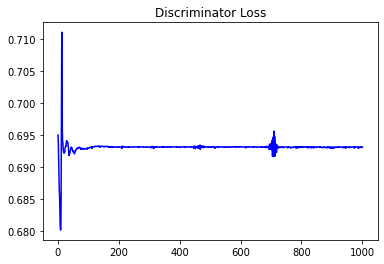

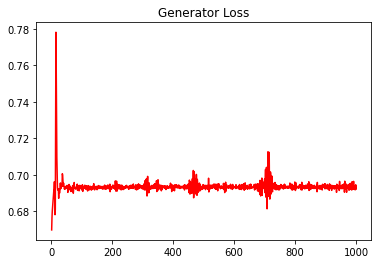

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0789205841653697


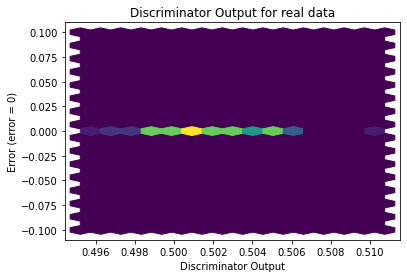

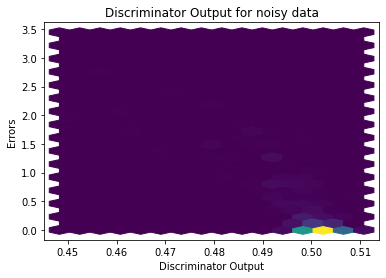

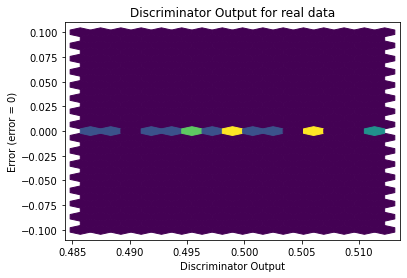

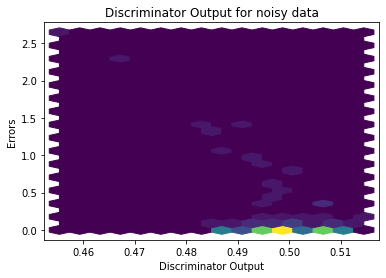

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


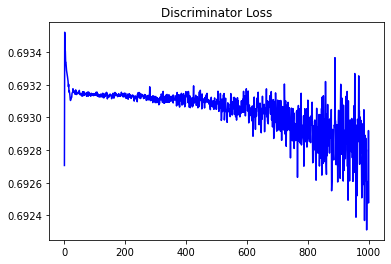

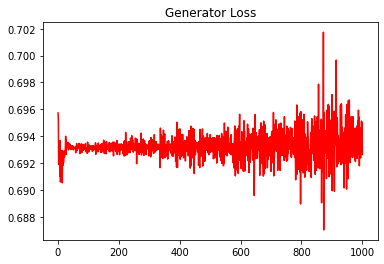

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10701603106766489


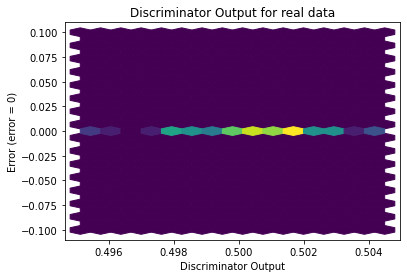

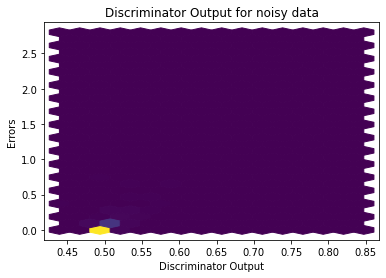

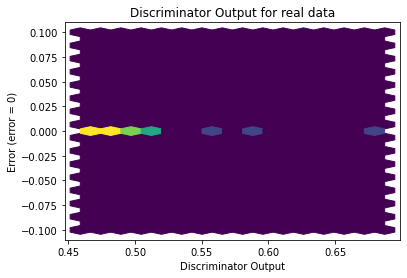

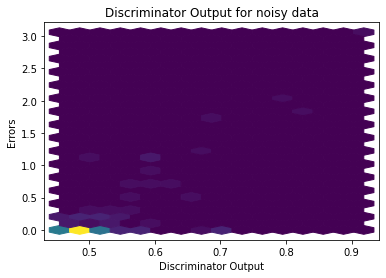

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
